<a href="https://colab.research.google.com/github/vash4/My-Project/blob/master/optimum_number_of_Clusters_using_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GRIP- The Sparks Foundation--Data Science & Business Analystics Inter- Task-2 In this predict the optimum number of Clusters - using K-means

In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R
# Installing Packages  
install.packages("ClusterR")  
install.packages("cluster") 
install("ggplot2") 


In [ ]:
%%R
# Loading package  
library(ClusterR)  
library(cluster)  
library(ggplot2)

In [ ]:
%%R
# Loading data  
df <- readline("https://bit.ly//3kXTdox")
str(df)
summary(df)


In [15]:
%%R
# Removing initial label of Species from original dataset  
iris_1 <- iris[, -5]  
head(iris_1)

  Sepal.Length Sepal.Width Petal.Length Petal.Width
1          5.1         3.5          1.4         0.2
2          4.9         3.0          1.4         0.2
3          4.7         3.2          1.3         0.2
4          4.6         3.1          1.5         0.2
5          5.0         3.6          1.4         0.2
6          5.4         3.9          1.7         0.4


In [34]:
%%R
# Fitting K-Means clustering Model  
# to training dataset  
set.seed(123) # Setting seed  
km <- kmeans(iris_1, centers = 3,  
                    nstart = 20)  
km 

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [17]:
%%R
# Cluster identification for each observation  
km$cluster  

  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2


In [18]:
%%R
# Confusion Matrix  
cm <- table(iris$Species, km$cluster)  
cm  

            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0 14 36


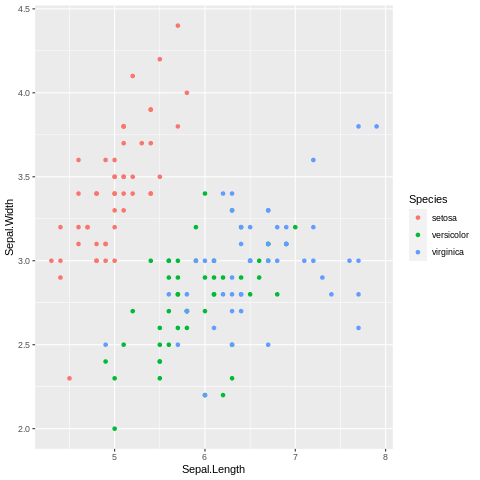

In [24]:
%%R
ggplot(iris,aes(x = Sepal.Length, y = Sepal.Width, col= Species)) + geom_point()

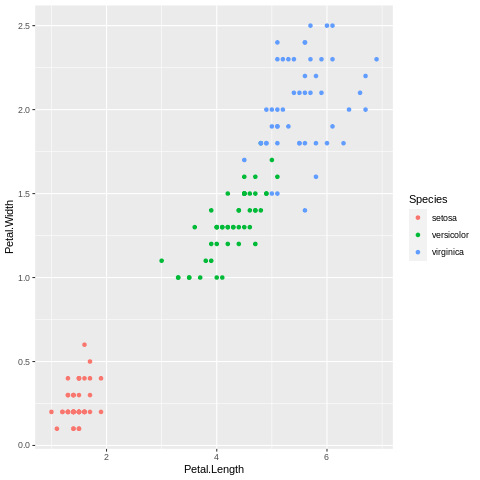

In [25]:
%%R
ggplot(iris,aes(x = Petal.Length, y = Petal.Width, col= Species)) + geom_point()

  Sepal.Length Sepal.Width
1     5.006000    3.428000
2     5.901613    2.748387
3     6.850000    3.073684


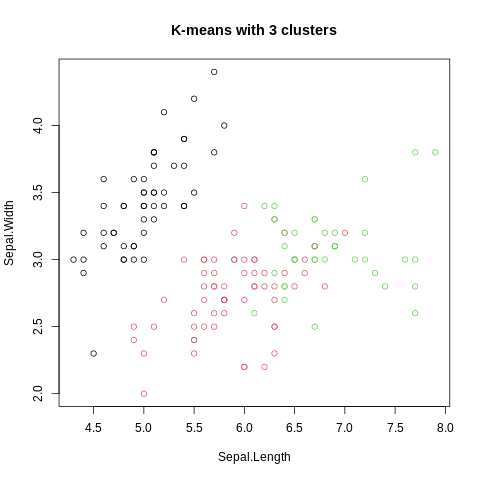

In [29]:
%%R
# Model Evaluation and visualization  

plot(iris_1[c("Sepal.Length", "Sepal.Width")],  
     col = km$cluster,  
     main = "K-means with 3 clusters")  



In [30]:
%%R
# Plotiing cluster centers  
km$centers  
km$centers[, c("Sepal.Length",  
                      "Sepal.Width")]  


  Sepal.Length Sepal.Width
1     5.006000    3.428000
2     5.901613    2.748387
3     6.850000    3.073684


In [32]:
%%R
# Finding the optimimum number of clusters 
set.seed(200)
k.max <- 10
wss<- sapply(1:k.max,function(k){kmeans(iris[,3:4],k,nstart = 20,iter.max = 20)$tot.withinss})
wss

 [1] 550.895333  86.390220  31.371359  19.465989  13.916909  11.025145
 [7]   9.236596   7.674414   6.456495   5.550520


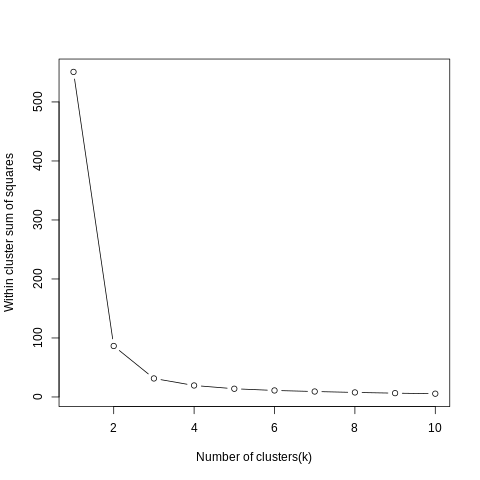

In [33]:
%%R
plot(1:k.max,wss, type= "b", xlab = "Number of clusters(k)", ylab = "Within cluster sum of squares")